<a href="https://colab.research.google.com/github/EdivaldoVictor/Projeto-Big-Data-Python/blob/main/AnaliseElei%C3%A7%C3%B5es2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Big Data com Python - Eleições Presidenciais do Brasil (2022)**

**Importando as Bibliotecas Necessárias para o Projeto**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Criando nosso DataFrame a partir da planilha**

In [ ]:
df = pd.read_csv('drive/MyDrive/PlanilhaEleições/votacao_secao_2022_BR.csv', encoding='latin1', sep=';')

**Analisando se há colunas sem valores "Nulas"**

In [ ]:
df.info
df.isnull().sum()

,0
DT_GERACAO,0
HH_GERACAO,0
ANO_ELEICAO,0
CD_TIPO_ELEICAO,0
NM_TIPO_ELEICAO,0
NR_TURNO,0
CD_ELEICAO,0
DS_ELEICAO,0
DT_ELEICAO,0
TP_ABRANGENCIA,0


**Criando uma Variável com os Nomes dos Candidatos**

In [ ]:
candidatos = list(df.NM_VOTAVEL.unique())
candidatos

['LUIZ INÁCIO LULA DA SILVA',
 'JOSE MARIA EYMAEL',
 'LUIZ FELIPE CHAVES D AVILA',
 'KELMON LUIS DA SILVA SOUZA',
 'VOTO BRANCO',
 'SORAYA VIEIRA THRONICKE',
 'CIRO FERREIRA GOMES',
 'SOFIA PADUA MANZANO',
 'JAIR MESSIAS BOLSONARO',
 'SIMONE NASSAR TEBET',
 'LEONARDO PÉRICLES VIEIRA ROQUE',
 'VOTO NULO',
 'VERA LUCIA PEREIRA DA SILVA SALGADO']

**Juntando as Cidades de Estados na Coluna Cidade**

In [ ]:
def mescla_cidade_e_estado(n):
    return n.NM_MUNICIPIO + "-" + n.SG_UF

df.NM_MUNICIPIO = df.apply(mescla_cidade_e_estado, axis=1)

**Quantidade de Municípios Eleitorais**

In [ ]:
len(df.NM_MUNICIPIO.unique())

5710

**Separando nosso dataframe por Turno 1 e Turno 2**

In [ ]:
#separando os dataframes de primeiro e segundo turno
df_turno1 = df[df.NR_TURNO == 1]
df_turno2 = df[df.NR_TURNO == 2]


#**Votos Por Candidato no Primeiro Turno**

In [ ]:
# Agrupando os votos por candidato e somando quantidade de votos
votos_por_candidato = df_turno1.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()

# Removendo os votos nulos e brancos
votos_por_candidato = votos_por_candidato.drop(index=['VOTO NULO', 'VOTO BRANCO'], errors='ignore')

# Ordenando os em ordem decrescente
votos_por_candidato = votos_por_candidato.sort_values(ascending=False)

# Aqui calculamos a porcentagem de votos por candidato
total_votos = votos_por_candidato.sum()
porcentagens = (votos_por_candidato / total_votos) * 100




**Tabela**

In [ ]:
# Criando um DataFrame com os votos e porcentagens
tabela_votos = pd.DataFrame({
    'Candidato': votos_por_candidato.index,
    'Votos': votos_por_candidato.values,
    'Porcentagem': [f"{p:.2f}%" for p in porcentagens.values]
})

tabela_votos

,Candidato,Votos,Porcentagem
0,LUIZ INÁCIO LULA DA SILVA,57259504,48.43%
1,JAIR MESSIAS BOLSONARO,51072345,43.20%
2,SIMONE NASSAR TEBET,4915423,4.16%
3,CIRO FERREIRA GOMES,3599287,3.04%
4,SORAYA VIEIRA THRONICKE,600955,0.51%
5,LUIZ FELIPE CHAVES D AVILA,559708,0.47%
6,KELMON LUIS DA SILVA SOUZA,81129,0.07%
7,LEONARDO PÉRICLES VIEIRA ROQUE,53519,0.05%
8,SOFIA PADUA MANZANO,45620,0.04%
9,VERA LUCIA PEREIRA DA SILVA SALGADO,25625,0.02%


**Gráfico**

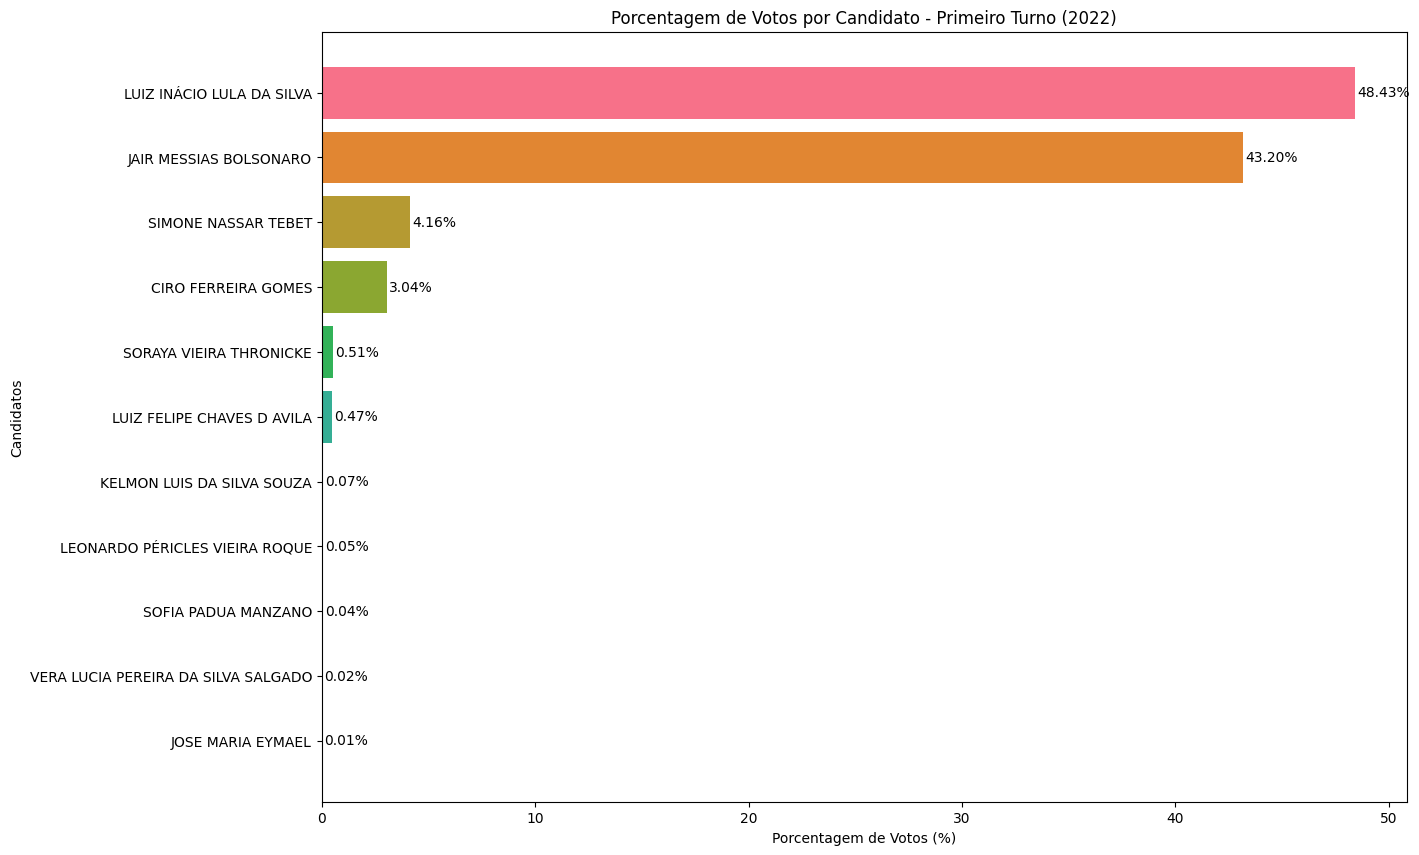

In [ ]:
plt.figure(figsize=(14, 10))
cores = sns.color_palette("husl", len(votos_por_candidato))

plt.barh(votos_por_candidato.index, porcentagens, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("Porcentagem de Votos por Candidato - Primeiro Turno (2022)")

for i, v in enumerate(porcentagens):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

#**Os 4 Candidatos Mais Votados no Primeiro Turno**

In [ ]:
top4_candidatos = votos_por_candidato.head(4)
top4_porcentagens = porcentagens.head(4)



**Tabela**

In [ ]:
top4_df = pd.DataFrame({
    'Candidato': top4_candidatos.index,
    'Votos': top4_candidatos.values,
    'Porcentagem': [f"{p:.2f}%" for p in top4_porcentagens.values]
})
print("Tabela dos 4 Mais Votados - Primeiro Turno (2022)")
top4_df

Tabela dos 4 Mais Votados - Primeiro Turno (2022)


,Candidato,Votos,Porcentagem
0,LUIZ INÁCIO LULA DA SILVA,57259504,48.43%
1,JAIR MESSIAS BOLSONARO,51072345,43.20%
2,SIMONE NASSAR TEBET,4915423,4.16%
3,CIRO FERREIRA GOMES,3599287,3.04%


**Gráfico**

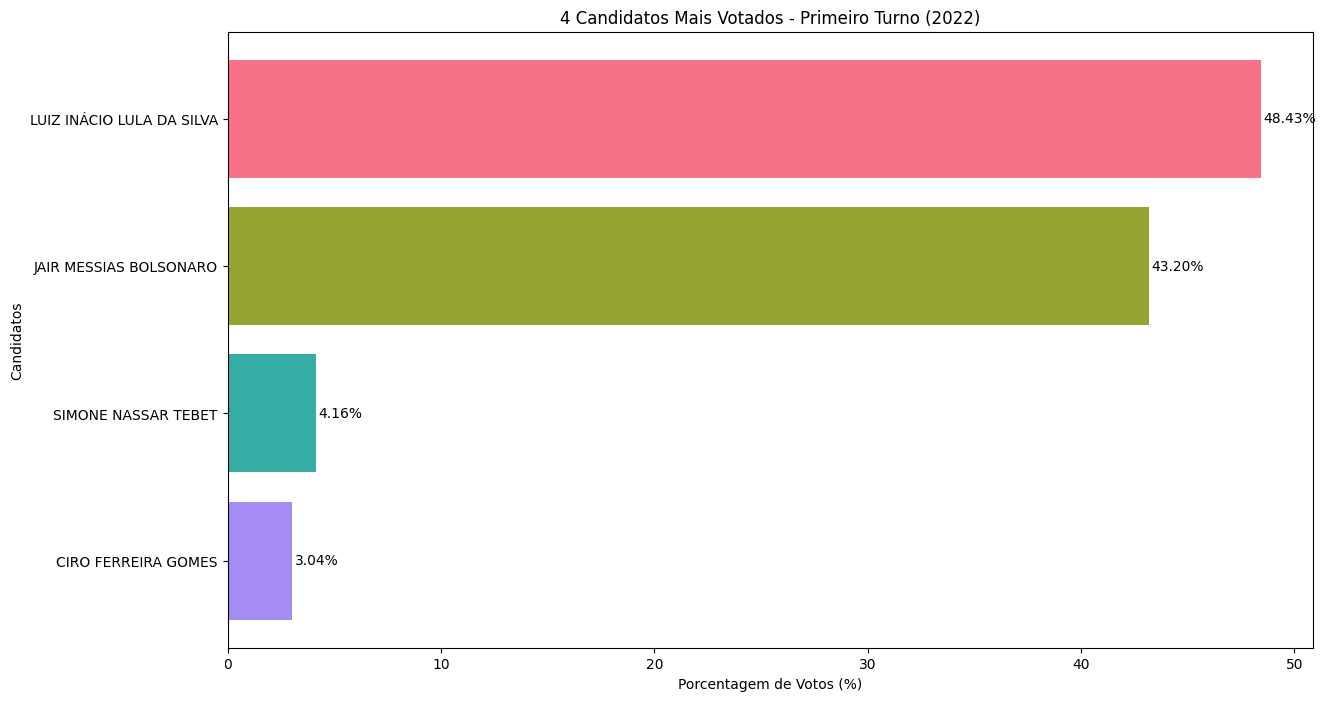

In [ ]:
plt.figure(figsize=(14, 8))
cores = sns.color_palette("husl", len(top4_candidatos))

plt.barh(top4_candidatos.index, top4_porcentagens, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("4 Candidatos Mais Votados - Primeiro Turno (2022)")

for i, v in enumerate(top4_porcentagens):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

#**Votos Brancos e Nulos no Primeiro Turno**

In [ ]:
# Calculando votos nulos e brancos
votos_nulos = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO NULO']['QT_VOTOS'].sum()
votos_brancos = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO BRANCO']['QT_VOTOS'].sum()

# Total de votos nulos e brancos
total_nulos_brancos = votos_nulos + votos_brancos

# (excluindo nulos e brancos)
total_votos_validos = df_turno1['QT_VOTOS'].sum() - total_nulos_brancos



**Tabela**

In [ ]:
# Porcentagem de votos nulos e brancos
percent_nulos = (votos_nulos / df_turno1['QT_VOTOS'].sum()) * 100
percent_brancos = (votos_brancos / df_turno1['QT_VOTOS'].sum()) * 100

# Criando a tabela
data = {'Tipo de Voto': ['Brancos', 'Nulos', 'Total'],
        'Quantidade': [votos_brancos, votos_nulos, total_nulos_brancos],
        'Porcentagem': [f'{percent_brancos:.2f}%', f'{percent_nulos:.2f}%', f'{(percent_brancos + percent_nulos):.2f}%']}

tabela_nulos_brancos = pd.DataFrame(data)

print("Tabela de Votos Brancos e Nulos - Primeiro Turno (2022)")
tabela_nulos_brancos

Tabela de Votos Brancos e Nulos - Primeiro Turno (2022)


,Tipo de Voto,Quantidade,Porcentagem
0,Brancos,1964779,1.59%
1,Nulos,3487874,2.82%
2,Total,5452653,4.41%


**Gráfico**

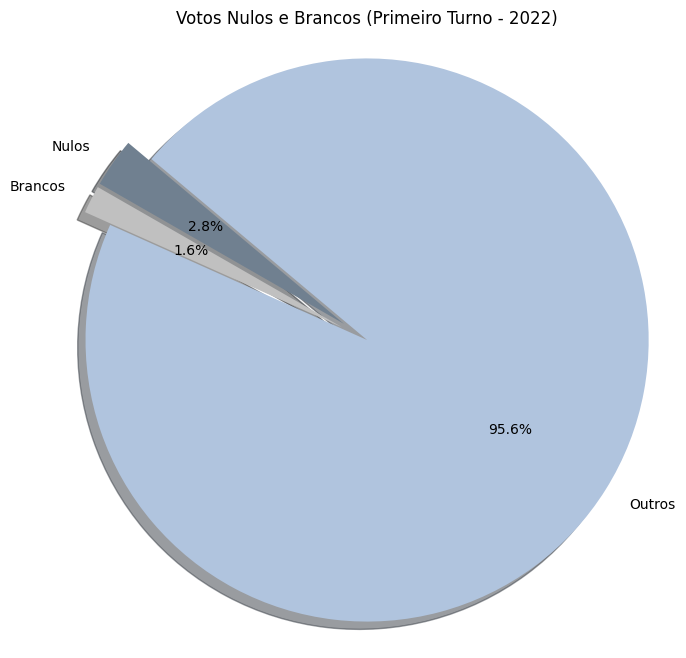

In [ ]:
labels = ['Nulos', 'Brancos', 'Outros']
sizes = [votos_nulos, votos_brancos, total_votos_validos]
colors = ['slategray', 'silver', 'lightsteelblue']
explode = (0.1, 0.1, 0)
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Votos Nulos e Brancos (Primeiro Turno - 2022)')
plt.show()

#**Votos por Candidato no Segundo Turno**

In [ ]:
# Agrupa os votos por candidato e soma a quantidade de votos para o segundo turno
votos_por_candidato_t2 = df_turno2.groupby('NM_VOTAVEL')['QT_VOTOS'].sum()

# Removendo os votos nulos e brancos do segundo turno
votos_por_candidato_t2 = votos_por_candidato_t2.drop(index=['VOTO NULO', 'VOTO BRANCO'], errors='ignore')

# Ordenando os votos em ordem decrescente para o segundo turno
votos_por_candidato_t2 = votos_por_candidato_t2.sort_values(ascending=False)

# Calculando a porcentagem de votos por candidato para o segundo turno
total_votos_t2 = votos_por_candidato_t2.sum()
porcentagens_t2 = (votos_por_candidato_t2 / total_votos_t2) * 100


**Tabela**

In [ ]:
tabela_votos_t2 = pd.DataFrame({
    'Candidato': votos_por_candidato_t2.index,
    'Votos': votos_por_candidato_t2.values,
    'Porcentagem': [f"{p:.2f}%" for p in porcentagens_t2.values]
})
print("Tabela de Votos - Segundo Turno (2022)")
tabela_votos_t2

Tabela de Votos - Segundo Turno (2022)


,Candidato,Votos,Porcentagem
0,LUIZ INÁCIO LULA DA SILVA,60345999,50.90%
1,JAIR MESSIAS BOLSONARO,58206354,49.10%


**Gráfico**

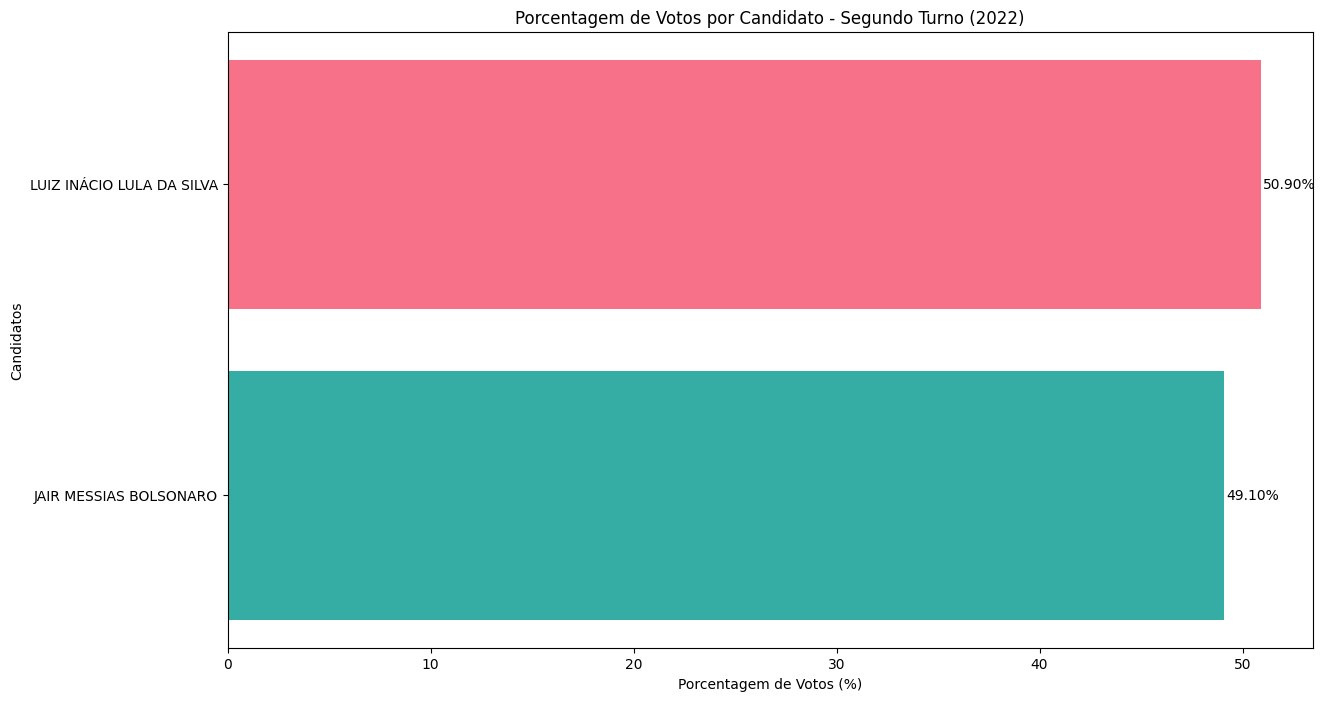

In [ ]:
plt.figure(figsize=(14, 8))
cores = sns.color_palette("husl", len(votos_por_candidato_t2))

plt.barh(votos_por_candidato_t2.index, porcentagens_t2, color=cores)
plt.xlabel("Porcentagem de Votos (%)")
plt.ylabel("Candidatos")
plt.title("Porcentagem de Votos por Candidato - Segundo Turno (2022)")


for i, v in enumerate(porcentagens_t2):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center')

plt.gca().invert_yaxis()
plt.show()

#**Votos Brancos e Nulos Segundo turno**

In [ ]:
# Calculando votos nulos e brancos
votos_nulos2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO NULO']['QT_VOTOS'].sum()
votos_brancos2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO BRANCO']['QT_VOTOS'].sum()

# Total de votos nulos e brancos
total_nulos_brancos2 = votos_nulos2 + votos_brancos2

# Total de votos válidos (excluindo nulos e brancos)
total_votos_validos2 = df_turno2['QT_VOTOS'].sum() - total_nulos_brancos2


**Tabela**

In [ ]:
# Porcentagem de votos nulos e brancos
percent_nulos2 = (votos_nulos / df_turno2['QT_VOTOS'].sum()) * 100
percent_brancos2 = (votos_brancos / df_turno2['QT_VOTOS'].sum()) * 100

# Criando a tabela
data2 = {'Tipo de Voto': ['Brancos', 'Nulos', 'Total'],
        'Quantidade': [votos_brancos2, votos_nulos2, total_nulos_brancos2],
        'Porcentagem': [f'{percent_brancos2:.2f}%', f'{percent_nulos2:.2f}%', f'{(percent_brancos2 + percent_nulos2):.2f}%']}

tabela_nulos_brancos2 = pd.DataFrame(data2)

print("Tabela de Votos Brancos e Nulos - Segundo Turno (2022)")
tabela_nulos_brancos2

Tabela de Votos Brancos e Nulos - Segundo Turno (2022)


,Tipo de Voto,Quantidade,Porcentagem
0,Brancos,1769678,1.58%
1,Nulos,3930765,2.81%
2,Total,5700443,4.39%


**Gráfico**

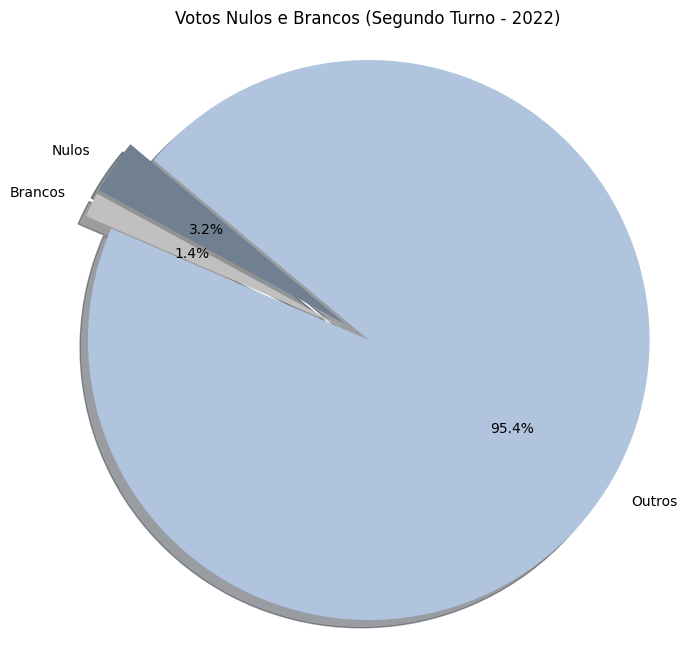

In [ ]:
labels = ['Nulos', 'Brancos', 'Outros']
sizes = [votos_nulos2, votos_brancos2, total_votos_validos2]
colors = ['slategray', 'silver', 'lightsteelblue']
explode = (0.1, 0.1, 0)

plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Votos Nulos e Brancos (Segundo Turno - 2022)')
plt.show()

#**Votos Por Estado no Primeiro Turno**

In [53]:
votos_por_estado = df_turno1.groupby('SG_UF')['QT_VOTOS'].sum()

votos_por_estado = votos_por_estado.sort_values(ascending=False)


**Tabela**

In [ ]:
# Criando um DataFrame com os votos totais por estados
votos_por_estado_df = pd.DataFrame({'UF': votos_por_estado.index, 'Total de Votos': votos_por_estado.values})
votos_por_estado_df

,UF,Total de Votos
0,SP,27189714
1,MG,12655228
2,RJ,9909463
3,BA,8874841
4,RS,6890016
5,PR,6828543
6,PE,5738371
7,CE,5628610
8,PA,4789311
9,SC,4487474


**Gráfico**

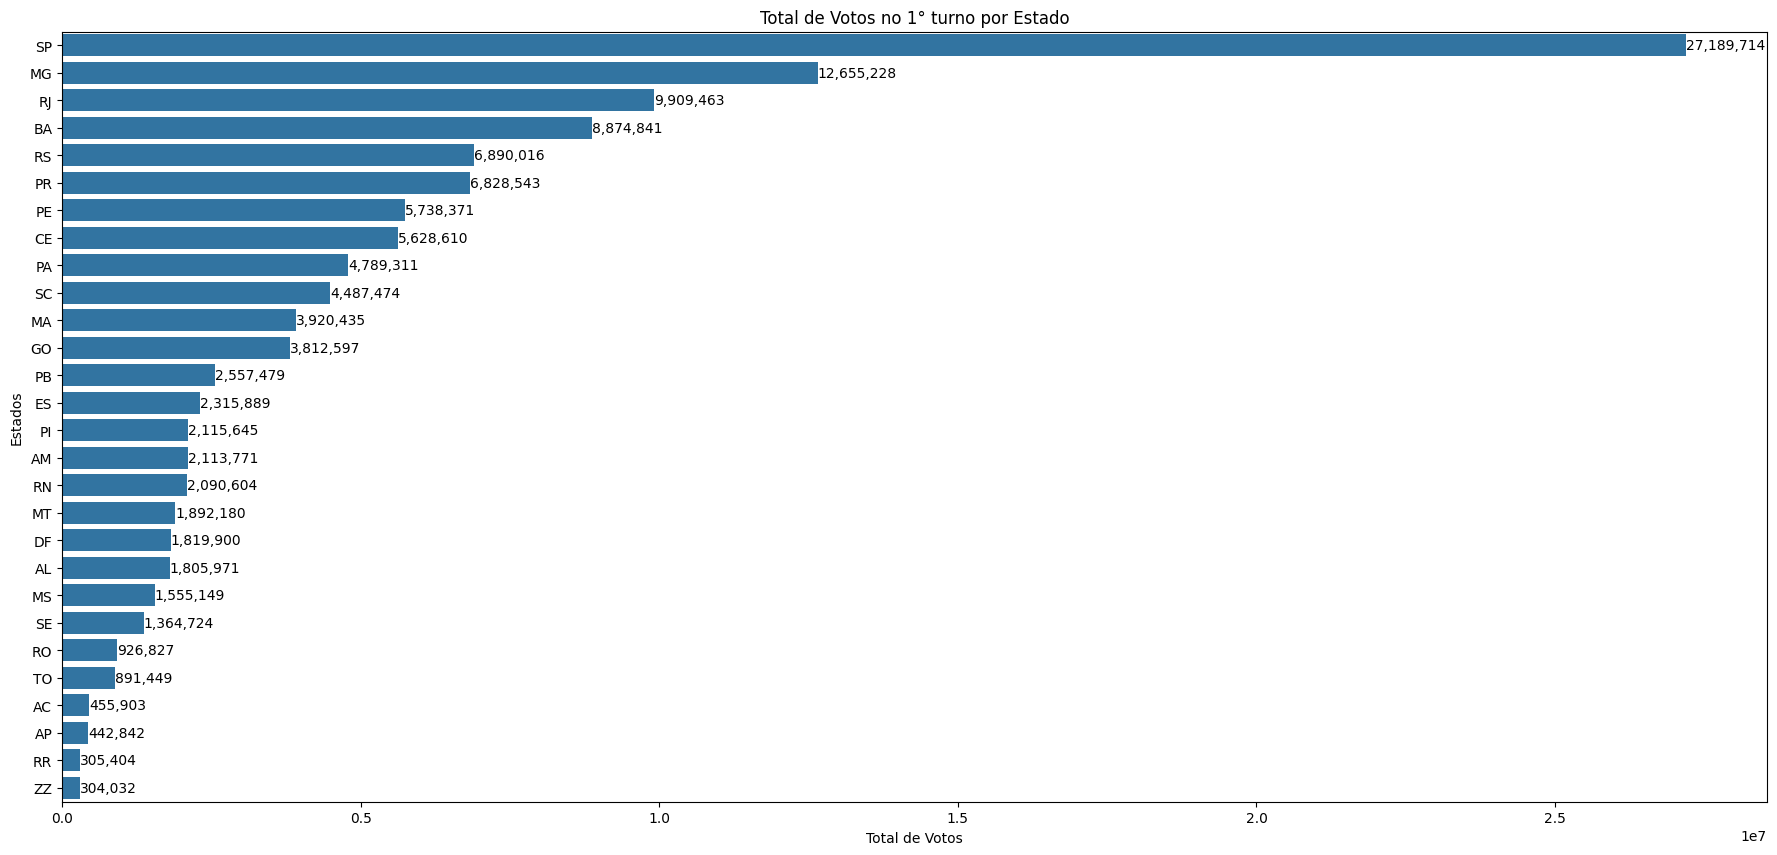

In [ ]:

plt.figure(figsize=(22, 10))
sns.barplot(x=votos_por_estado.values, y=votos_por_estado.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estados')
plt.title('Total de Votos no 1° turno por Estado')


for i, v in enumerate(votos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()



#**Votos Por Estado no Segundo Turno**

In [ ]:

votos_por_estado_t2 = df_turno2.groupby('SG_UF')['QT_VOTOS'].sum()


votos_por_estado_t2 = votos_por_estado_t2.sort_values(ascending=False)

**Tabela**

In [ ]:

# Criando um DataFrame com os votos totais por estados para o segundo turno
votos_por_estado_t2_df = pd.DataFrame({'UF': votos_por_estado_t2.index, 'Total de Votos': votos_por_estado_t2.values})

votos_por_estado_t2_df

,UF,Total de Votos
0,SP,27380491
1,MG,12866284
2,RJ,9973822
3,BA,8971728
4,RS,6930852
5,PR,6900420
6,PE,5800735
7,CE,5649398
8,PA,4701740
9,SC,4542817


**Gráfico**

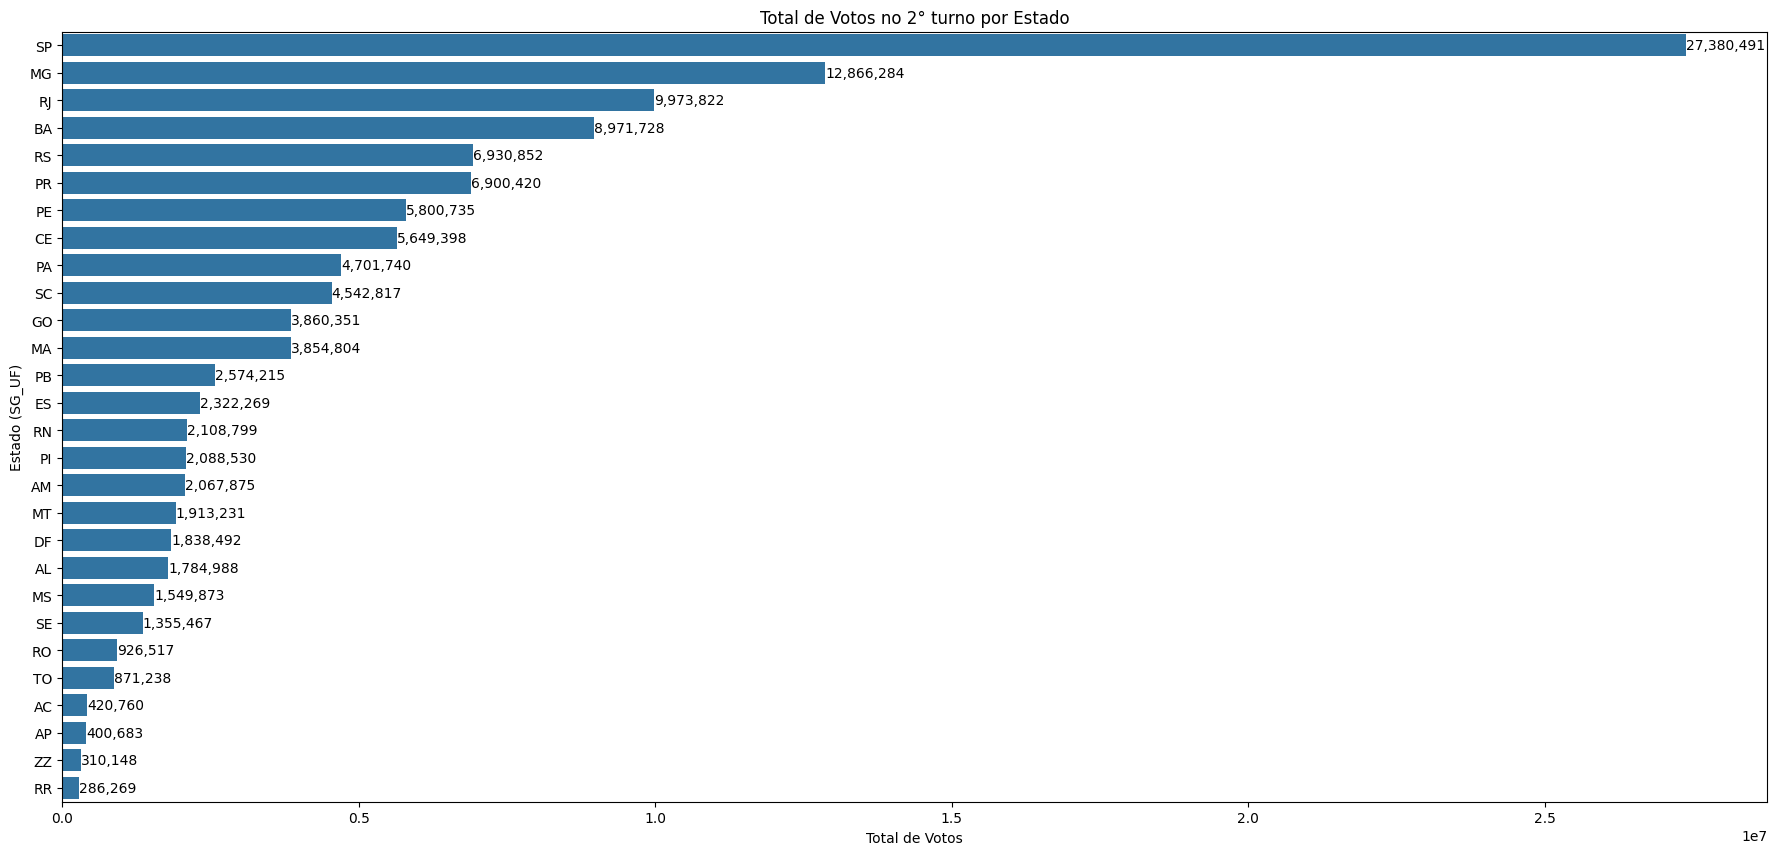

In [ ]:
plt.figure(figsize=(22, 10))
sns.barplot(x=votos_por_estado_t2.values, y=votos_por_estado_t2.index, orient='h')
plt.xlabel('Total de Votos')
plt.ylabel('Estado (SG_UF)')
plt.title('Total de Votos no 2° turno por Estado')

for i, v in enumerate(votos_por_estado_t2.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Nulos Por Estado Primeiro Turno**

In [ ]:
votos_nulos_por_estado = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO NULO'].groupby('SG_UF')['QT_VOTOS'].sum()

votos_nulos_por_estado = votos_nulos_por_estado.sort_values(ascending=False)

**Tabela**

In [ ]:
votos_nulos_df = pd.DataFrame({'UF': votos_nulos_por_estado.index, 'Votos Nulos': votos_nulos_por_estado.values})

print("Tabela de Votos Nulos- Segundo Turno (2022)")
votos_nulos_df

Tabela de Votos Nulos- Segundo Turno (2022)


,UF,Votos Nulos
0,SP,962123
1,MG,409170
2,BA,328383
3,RJ,293013
4,PE,196270
5,PR,152885
6,CE,127100
7,RS,122919
8,MA,103185
9,PB,93869


**Gráfico**

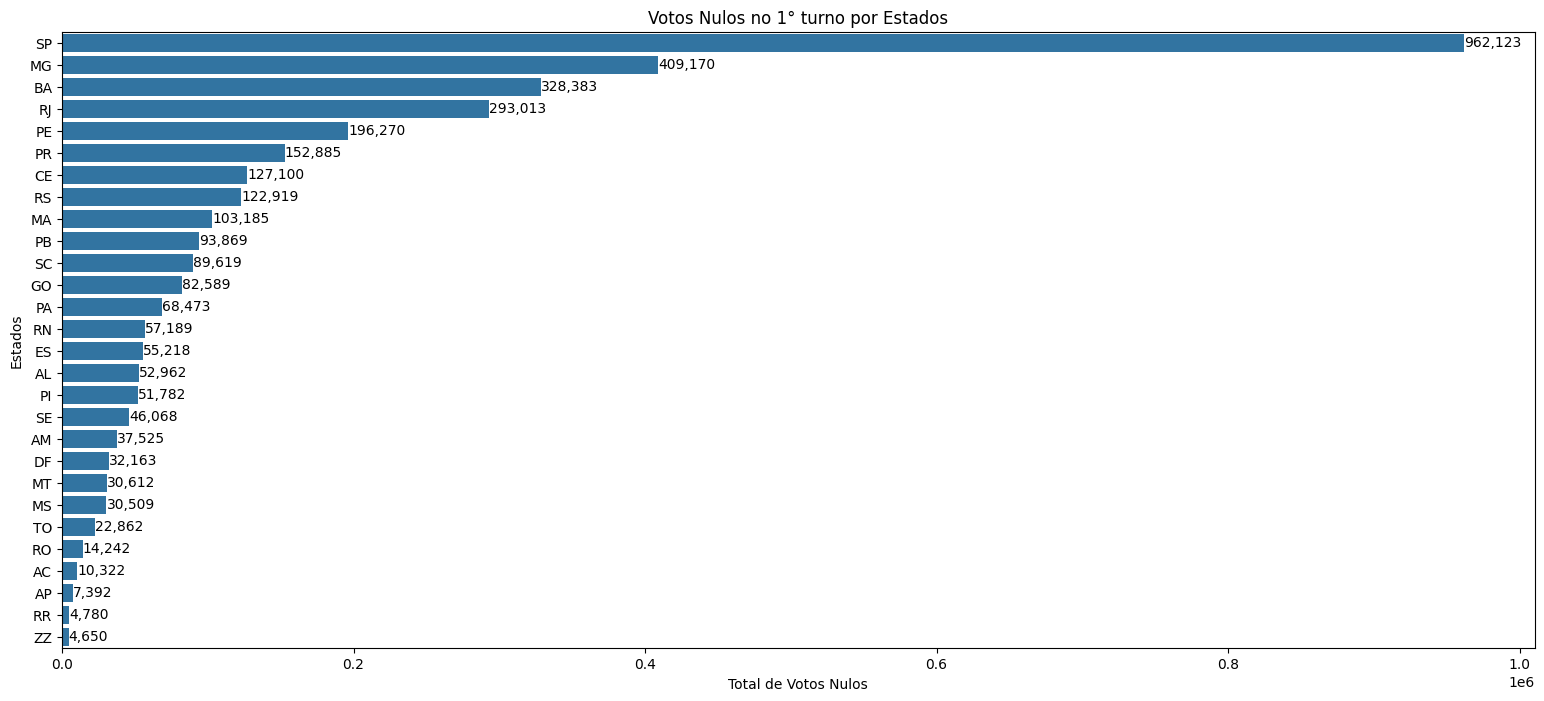

In [54]:
plt.figure(figsize=(19, 8))
sns.barplot(x=votos_nulos_por_estado.values, y=votos_nulos_por_estado.index, orient='h')
plt.xlabel('Total de Votos Nulos')
plt.ylabel('Estados')
plt.title('Votos Nulos no 1° turno por Estados')

for i, v in enumerate(votos_nulos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Nulos Por Estado Segundo Turno**

In [ ]:
votos_nulos_por_estado2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO NULO'].groupby('SG_UF')['QT_VOTOS'].sum()
votos_nulos_por_estado2 = votos_nulos_por_estado2.sort_values(ascending=False)

**Tabela**

In [ ]:
votos_nulos_df2 = pd.DataFrame({'UF': votos_nulos_por_estado2.index, 'Votos Nulos': votos_nulos_por_estado2.values})

votos_nulos_df2

,UF,Votos Nulos
0,SP,1117345
1,BA,395664
2,MG,350808
3,RJ,287066
4,PE,286535
5,RS,183360
6,CE,139985
7,PR,138917
8,PB,134293
9,AL,96954


**Gráfico**

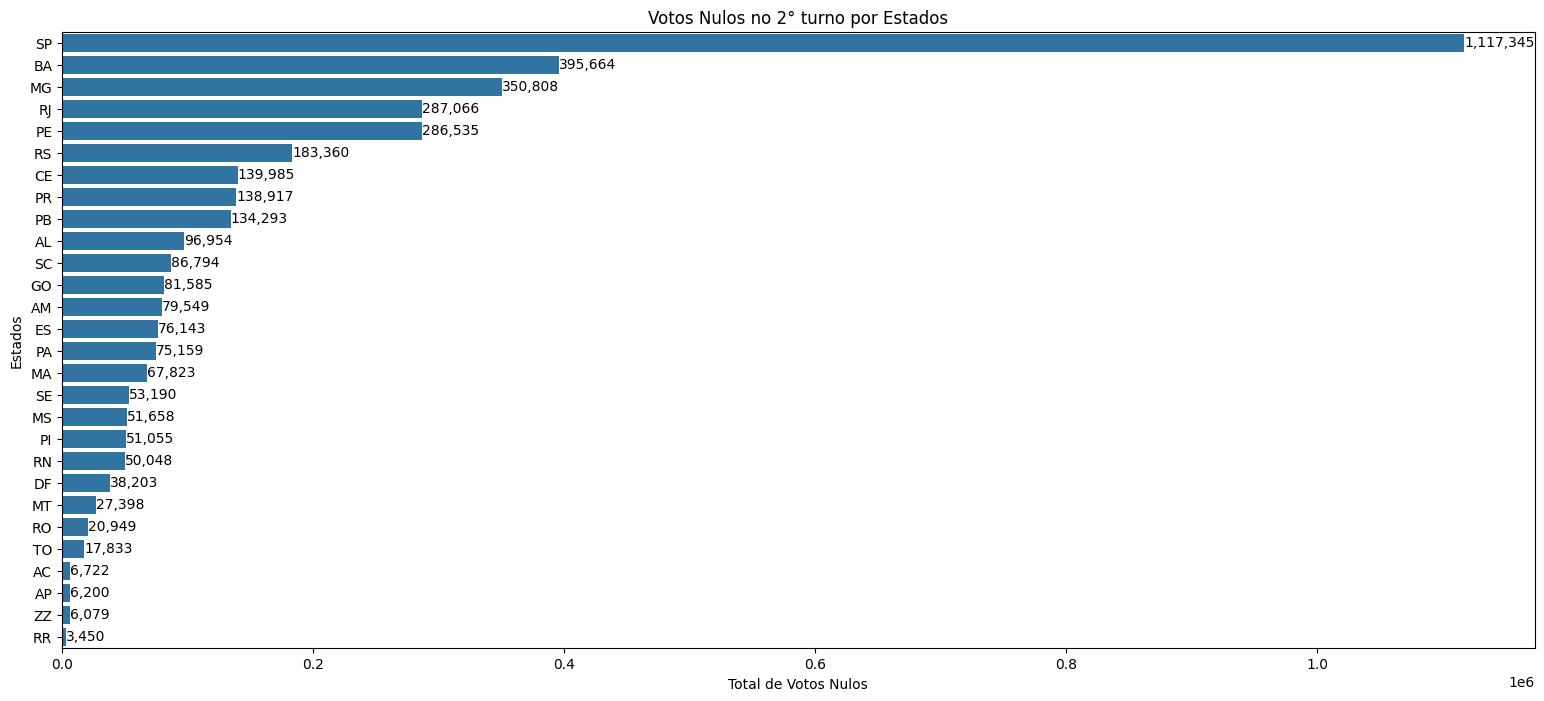

In [ ]:
plt.figure(figsize=(19, 8))
sns.barplot(x=votos_nulos_por_estado2.values, y=votos_nulos_por_estado2.index, orient='h')
plt.xlabel('Total de Votos Nulos')
plt.ylabel('Estados')
plt.title('Votos Nulos no 2° turno por Estados')

for i, v in enumerate(votos_nulos_por_estado2.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Brancos por Estado no Primeiro Turno**

In [ ]:
votos_brancos_por_estado = df_turno1[df_turno1['NM_VOTAVEL'] == 'VOTO BRANCO'].groupby('SG_UF')['QT_VOTOS'].sum()

votos_brancos_por_estado = votos_brancos_por_estado.sort_values(ascending=False)



**Tabela**

In [ ]:
votos_brancos_df = pd.DataFrame({'UF': votos_brancos_por_estado.index, 'Votos Brancos': votos_brancos_por_estado.values})
print("Tabela de Votos Brancos por Estado - Primeiro Turno (2022)")
votos_brancos_df

Tabela de Votos Brancos por Estado - Primeiro Turno (2022)


,UF,Votos Brancos
0,SP,571257
1,MG,229425
2,RJ,159773
3,RS,129345
4,BA,123450
5,PR,108894
6,PE,90092
7,CE,72246
8,SC,66871
9,GO,48539


**Gráfico**

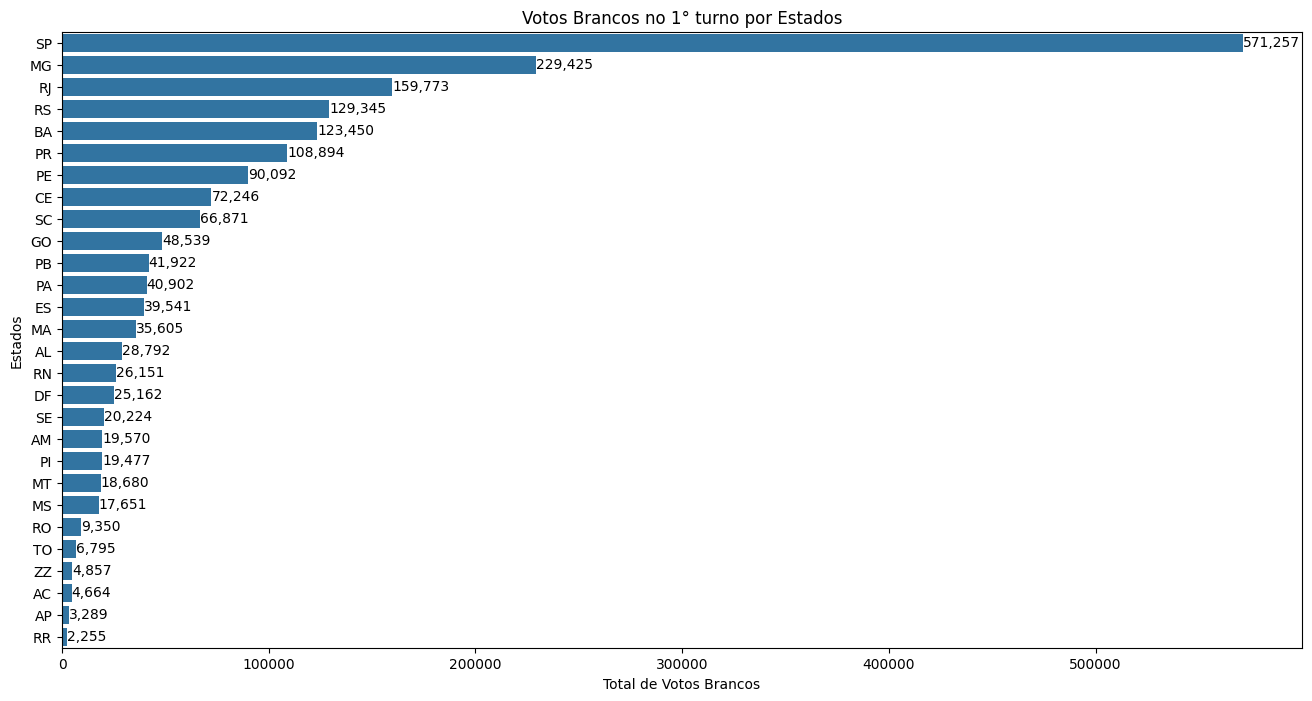

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x=votos_brancos_por_estado.values, y=votos_brancos_por_estado.index, orient='h')
plt.xlabel('Total de Votos Brancos')
plt.ylabel('Estados')
plt.title('Votos Brancos no 1° turno por Estados')
for i, v in enumerate(votos_brancos_por_estado.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()

#**Votos Brancos por Estado no Segundo Turno**

In [ ]:
votos_brancos_por_estado2 = df_turno2[df_turno2['NM_VOTAVEL'] == 'VOTO BRANCO'].groupby('SG_UF')['QT_VOTOS'].sum()

votos_brancos_por_estado2 = votos_brancos_por_estado2.sort_values(ascending=False)


In [ ]:
votos_brancos_df2 = pd.DataFrame({'UF': votos_brancos_por_estado2.index, 'Votos Brancos': votos_brancos_por_estado2.values})
print("Tabela de Votos Brancos por Estado - Segundo Turno (2022)")
votos_brancos_df2

Tabela de Votos Brancos por Estado - Segundo Turno (2022)


,UF,Votos Brancos
0,SP,526677
1,MG,183206
2,RJ,126645
3,RS,122456
4,BA,121221
5,PR,95555
6,PE,74435
7,CE,67045
8,SC,56475
9,GO,43610


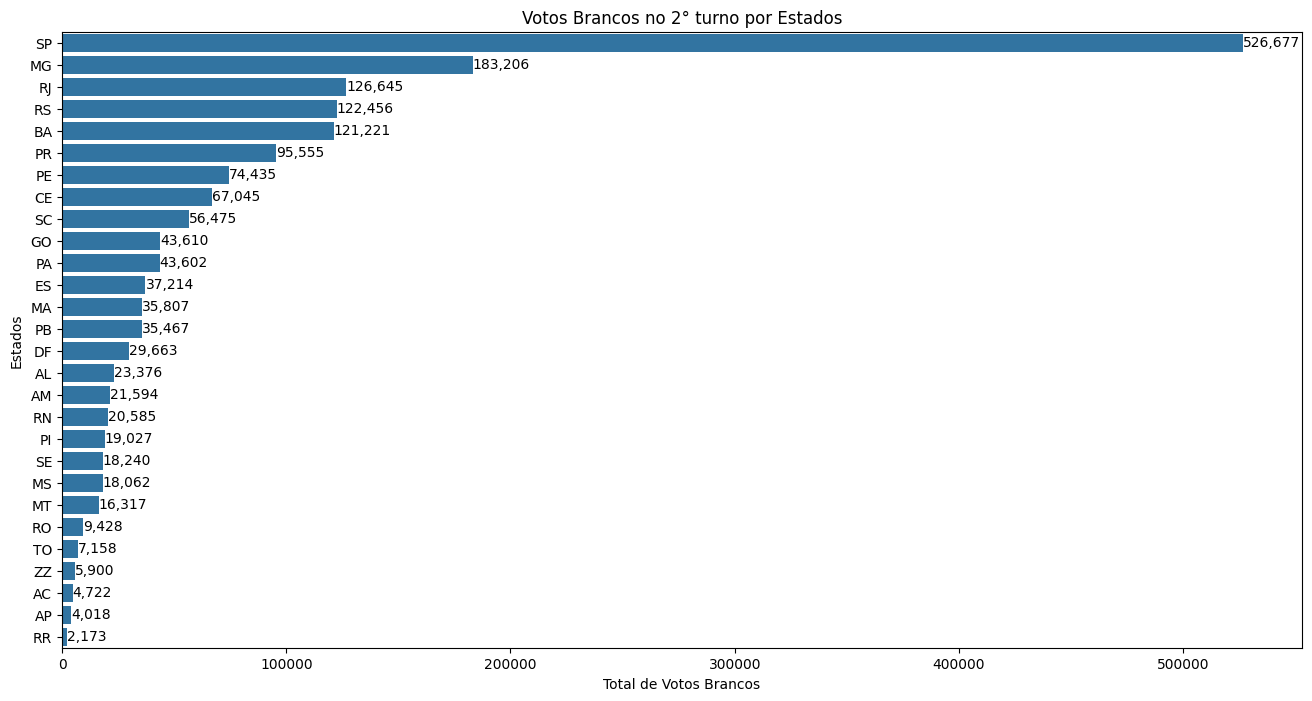

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x=votos_brancos_por_estado2.values, y=votos_brancos_por_estado2.index, orient='h')
plt.xlabel('Total de Votos Brancos')
plt.ylabel('Estados')
plt.title('Votos Brancos no 2° turno por Estados')

for i, v in enumerate(votos_brancos_por_estado2.values):
    plt.text(v, i, f'{v:,}', va='center')

plt.show()